In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* [ShAP Analysis](#ShAP)
* [LOO Atom Feature Vectors](#LOOA)

In [2]:
pred_results = pd.read_csv('CN_prediction/prediction_results.csv')
pred_results

,Canonical_SMILES,predicted,glob_vector
0,CCCCCCCCC=CCCCCCCCC(=O)OC,57.968250,2.691359 14.592577 -9.436016 -5.058426 3.00275...
1,CCCCC/C=C\C/C=C\CCCCCCCC(=O)O,32.391770,1.516830 8.199538 -5.012877 -3.377009 1.524693...
2,CCCCC1CCCC2CCCCC12,29.558363,1.745942 7.646198 -4.469604 -2.352664 1.533207...
3,C=CC(C)=CCC=C(C)C,28.981422,1.265745 7.677176 -4.606571 -2.230392 1.572281...
4,CCCCCCCC(=O)OCC,41.965748,1.682150 10.854991 -6.497654 -3.748829 2.38611...
...,...,...,...
625,CCCCCCCCCCCCCCCCCC(=O)O,70.268486,4.218514 18.318501 -10.543983 -6.405914 4.1426...
626,CCCCCCCCCCCCCCCCc1cc(C)cc(C)c1C,38.849712,2.940196 9.780895 -6.842910 -3.857143 3.013691...
627,CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCC,46.116287,1.885478 14.634891 -7.869593 -3.706098 2.03854...
628,CCCc1ccc2c(c1)CCCC2,7.196461,0.202410 1.829507 -1.479237 -0.212674 0.350839...


In [3]:
glob_vecs = []
for item in pred_results['glob_vector']:
    glob_vecs.append(item.split(' '))
pred_results['glob_vecs'] = glob_vecs

In [4]:
pred_results = pred_results.drop(['glob_vector'], axis=1)

In [5]:
pred_results

,Canonical_SMILES,predicted,glob_vecs
0,CCCCCCCCC=CCCCCCCCC(=O)OC,57.968250,"[2.691359, 14.592577, -9.436016, -5.058426, 3...."
1,CCCCC/C=C\C/C=C\CCCCCCCC(=O)O,32.391770,"[1.516830, 8.199538, -5.012877, -3.377009, 1.5..."
2,CCCCC1CCCC2CCCCC12,29.558363,"[1.745942, 7.646198, -4.469604, -2.352664, 1.5..."
3,C=CC(C)=CCC=C(C)C,28.981422,"[1.265745, 7.677176, -4.606571, -2.230392, 1.5..."
4,CCCCCCCC(=O)OCC,41.965748,"[1.682150, 10.854991, -6.497654, -3.748829, 2...."
...,...,...,...
625,CCCCCCCCCCCCCCCCCC(=O)O,70.268486,"[4.218514, 18.318501, -10.543983, -6.405914, 4..."
626,CCCCCCCCCCCCCCCCc1cc(C)cc(C)c1C,38.849712,"[2.940196, 9.780895, -6.842910, -3.857143, 3.0..."
627,CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCC,46.116287,"[1.885478, 14.634891, -7.869593, -3.706098, 2...."
628,CCCc1ccc2c(c1)CCCC2,7.196461,"[0.202410, 1.829507, -1.479237, -0.212674, 0.3..."


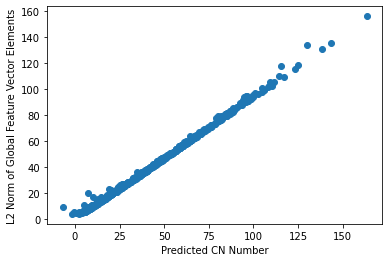

In [6]:
norms = []
for vec in pred_results['glob_vecs']:
    vec_arr = np.array(vec)
    norms.append(np.linalg.norm(vec_arr, ord = 2))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(pred_results['predicted'], norms)
ax1.set_xlabel('Predicted CN Number')
ax1.set_ylabel('L2 Norm of Global Feature Vector Elements')
plt.show()

In [ ]:
Get Tanimoto, Morgan fingerprints -> compare pairwise similarity w/ global vector pairwise element difference

In [7]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import itertools

In [30]:
mols = [Chem.MolFromSmiles(x) for x in pred_results['Canonical_SMILES']]
fps = [FingerprintMols.FingerprintMol(x) for x in mols]
qu, ta, sim = [], [], []
for n in range(len(fps)): # -1 so the last fp will not be used
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps[n+1:]) 
    print(pred_results['Canonical_SMILES'][n], pred_results['Canonical_SMILES'][n+1:])
    # collect the SMILES and values
    if len(s)>0:
        for m in range(len(s)):
            qu.append(pred_results['Canonical_SMILES'][n])
            ta.append(pred_results['Canonical_SMILES'][n+1:][m])
            sim.append(s[m])
print()

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'Similarity':sim}
df_final = pd.DataFrame(data=d)
df_final = df_final.sort_values('Similarity', ascending=False)
print(df_final)


CCCCCCCCC=CCCCCCCCC(=O)OC 1         CCCCC/C=C\C/C=C\CCCCCCCC(=O)O
2                    CCCCC1CCCC2CCCCC12
3                     C=CC(C)=CCC=C(C)C
4                       CCCCCCCC(=O)OCC
5                  CCCCCCCC(CCC)CCCCCCC
                     ...               
625             CCCCCCCCCCCCCCCCCC(=O)O
626     CCCCCCCCCCCCCCCCc1cc(C)cc(C)c1C
627    CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCC
628                 CCCc1ccc2c(c1)CCCC2
629                 c1ccc(-c2ccccc2)cc1
Name: Canonical_SMILES, Length: 629, dtype: object


KeyError: 0

In [8]:
mols = [Chem.MolFromSmiles(x) for x in pred_results['Canonical_SMILES']]
fps = [FingerprintMols.FingerprintMol(x) for x in mols]

query, target, sim = [], [], []
#itertools.product works top down
for n in itertools.product(fps, fps):
    s = DataStructs.FingerprintSimilarity(n[0], n[1])
    for m in range(len(fps)):
        query.append(pred_results['Canonical_SMILES'][fps.index(n[0])])
        target.append(pred_results['Canonical_SMILES'][fps.index(n[1])])
        sim.append(s)

KeyboardInterrupt: 

In [ ]:
def similarityGenerator(fp1, fp2):
     s = DataStructs.Fingerprint(fp1, fp2)

In [ ]:
#Making global vector correlational matrix

pred_results
for n in pred_results['']

## ShAP Analysis <a name="ShAP"></a>

In [153]:
import shap
import tensorflow as tf
import nfp
import os
import sys
sys.path.append(os.path.abspath('./CN_prediction/'))
from gnn import *

ModuleNotFoundError: No module named 'gnn.main'; 'gnn' is not a package

In [36]:
cn_model = tf.keras.models.load_model('CN_prediction/model_files/2_sw6_fold0/best_model.h5', custom_objects = nfp.custom_objects)

In [88]:
data = pd.read_csv('CN_prediction/data/CN_merged_210831.csv')
train = data.sample(frac=.8)
background = train.sample(frac=0.2)
test = data[~data.index.isin(background.index)]
test = test.sample(frac=0.1)

background.iloc[0,-1]
background.shape
test.shape

(53, 9)

In [67]:
preprocessor = CustomPreprocessor(explicit_hs=False,
    atom_features=atom_features,
    bond_features=bond_features)
preprocessor.from_json('./CN_prediction/model_files/2_sw6/preprocessor.json')
inputs = preprocessor.construct_feature_matrices(background.iloc[0, -1])
inputs = {key: np.expand_dims(inputs[key], axis=0) for key in ['atom','bond','connectivity','mol_features']} 
inputs

{'atom': array([[2, 3, 3, 2]], dtype=int32),
 'bond': array([[2, 2, 2, 2, 2, 2]], dtype=int32),
 'connectivity': array([[[0, 1],
         [1, 0],
         [1, 2],
         [2, 1],
         [2, 3],
         [3, 2]]], dtype=int32),
 'mol_features': array([[0, 0]], dtype=int32)}

In [89]:
output_signature = (preprocessor.output_signature,
                        tf.TensorSpec(shape=(), dtype=tf.float32),
                        tf.TensorSpec(shape=(), dtype=tf.float32))

bg_data = tf.data.Dataset.from_generator(
    lambda: create_tf_dataset(background['Canonical_SMILES'], preprocessor, 1.0, False), output_signature=output_signature)\
    .cache()\
    .padded_batch(batch_size=32)\
    .prefetch(tf.data.experimental.AUTOTUNE)

test_ls = []

for test_dat in test['Canonical_SMILES']:
    test_pt = tf.data.Dataset.from_generator(
        lambda: create_tf_dataset(test_dat, preprocessor, 1.0, False), output_signature=output_signature)\
        .cache()\
        .padded_batch(batch_size=32)\
        .prefetch(tf.data.experimental.AUTOTUNE)
    test_ls.append(test_pt)
    
    
test_data = tf.data.Dataset.from_generator(
    lambda: create_tf_dataset(test['Canonical_SMILES'], preprocessor, 1.0, False), output_signature=output_signature)\
    .cache()\
    .padded_batch(batch_size=32)\
    .prefetch(tf.data.experimental.AUTOTUNE) 


In [118]:
test_data

<PrefetchDataset shapes: ({atom: (None, None), bond: (None, None), connectivity: (None, None, 2), mol_features: (None, 2)}, (None,), (None,)), types: ({atom: tf.int32, bond: tf.int32, connectivity: tf.int32, mol_features: tf.float32}, tf.float32, tf.float32)>

In [91]:
bg_data

<PrefetchDataset shapes: ({atom: (None, None), bond: (None, None), connectivity: (None, None, 2), mol_features: (None, 2)}, (None,), (None,)), types: ({atom: tf.int32, bond: tf.int32, connectivity: tf.int32, mol_features: tf.float32}, tf.float32, tf.float32)>

In [103]:
e = shap.GradientExplainer(cn_model, bg_data)

In [106]:
shap_vals = e.shap_values(test_ls)
shap.plots.beeswarm(shap_vals)

AssertionError: Number of model inputs does not match the number given!

## Leave One Out Atom Feature Vectors <a name="LOOA"></a>

Since the ShAP library doesn't support zero padded inputs, we'll need to do something different. 

We'll rerun model predictions for several molecules, leaving one atom out of each run.

In [1]:
import shap
import tensorflow as tf
import nfp
import os
import sys
sys.path.append(os.path.abspath('./CN_prediction/'))
from gnn import *
import copy
from rdkit import Chem
data = pd.read_csv('CN_prediction/data/CN_merged_210831.csv')
train = data.sample(frac=.8)
background = train.sample(frac=0.2)
test = data[~data.index.isin(background.index)]
test = test.sample(frac=0.1)

background.iloc[0,-1]
background.shape
test.shape

/home/sabari/anaconda3/envs/cetanePred/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(53, 9)

In [2]:
preprocessor = CustomPreprocessor(explicit_hs=False,
    atom_features=atom_features,
    bond_features=bond_features)
preprocessor.from_json('./CN_prediction/model_files/051722Global/preprocessor.json')
inputs = preprocessor.construct_feature_matrices(background.iloc[0, -1])
inputs

{'atom': array([ 2,  3,  3,  3,  3,  3,  3,  5,  3,  4,  2,  2,  3,  4,  2,  2, 10,
        11, 11, 11, 11, 11], dtype=int32),
 'bond': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       dtype=int32),
 'connectivity': array([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 12],
        [ 7, 16],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 11],
        [10,  9],
        [11,  9],
        [12,  7],
        [12, 13],
        [13, 12],
        [13, 14],
        [13, 15],
        [14, 13],
        [15, 13],
        [16,  7],
        [16, 17],
        [16, 21],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 

In [3]:
model = tf.keras.models.load_model('./CN_prediction/model_files/051722Global/best_model.h5', custom_objects = nfp.custom_objects)
cns = []
for ind, inp in enumerate(inputs['atom']):
    new_ = copy.deepcopy(inputs)
    new_['atom'][ind] = 1
    new_ = {key: np.expand_dims(new_[key], axis=0) for key in ['atom','bond','connectivity','mol_features']} 
    predicted_CN = model.predict(new_).squeeze().squeeze()
    predicted_CN = np.round(predicted_CN,2)
    print(predicted_CN)
    cns.append(predicted_CN)
        

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
15.85
13.81
13.05
12.81
12.8
12.98
13.84
43.31
15.1
17.35
14.11
14.11
15.1
17.35
14.11
14.11
22.54
15.62
15.6
15.48
15.6
15.62


In [4]:
cns        

[15.85,
 13.81,
 13.05,
 12.81,
 12.8,
 12.98,
 13.84,
 43.31,
 15.1,
 17.35,
 14.11,
 14.11,
 15.1,
 17.35,
 14.11,
 14.11,
 22.54,
 15.62,
 15.6,
 15.48,
 15.6,
 15.62]

In [5]:
print(background.iloc[0, -1])


CCCCCCCC(CC(C)C)(CC(C)C)c1ccccc1


In [6]:
inputs = preprocessor.construct_feature_matrices(background.iloc[0, -1])
inputs = {key: np.expand_dims(inputs[key], axis=0) for key in ['atom','bond','connectivity','mol_features']} 
pred = model.predict(inputs).squeeze().squeeze()
pred = np.round(pred,2)
(predicted_CN)

15.62

In [36]:
target_smiles = Chem.MolToSmiles(Chem.MolFromSmiles('CCCC(CC(=O)OC)O'))
preprocessor = CustomPreprocessor(explicit_hs=False,
    atom_features=atom_features,
    bond_features=bond_features)
preprocessor.from_json('./CN_prediction/model_files/2_sw6/preprocessor.json')
inputs = preprocessor.construct_feature_matrices(target_smiles)
inputs

{'atom': array([2, 3, 3, 4, 7, 3, 5, 6, 6, 2], dtype=int32),
 'bond': array([2, 2, 2, 2, 2, 2, 5, 2, 7, 2, 2, 2, 4, 5, 6, 7, 7, 5], dtype=int32),
 'connectivity': array([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1],
        [2, 3],
        [3, 2],
        [3, 4],
        [3, 5],
        [4, 3],
        [5, 3],
        [5, 6],
        [6, 5],
        [6, 7],
        [6, 8],
        [7, 6],
        [8, 6],
        [8, 9],
        [9, 8]], dtype=int32),
 'mol_features': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 1], dtype=int32)>}

In [37]:
model = tf.keras.models.load_model('./CN_prediction/model_files/2_sw6/best_model.h5', custom_objects = nfp.custom_objects)
cns = []
for ind, inp in enumerate(inputs['atom']):
    new_ = copy.deepcopy(inputs)
    new_['atom'][ind] = 0
    new_ = {key: np.expand_dims(new_[key], axis=0) for key in ['atom','bond','connectivity','mol_features']} 
    predicted_CN = model.predict(new_).squeeze().squeeze()
    predicted_CN = np.round(predicted_CN,2)
    print(predicted_CN)
    cns.append(predicted_CN)

22.74
20.66
20.68
19.45
29.98
25.22
31.03
24.9
20.04
21.89


In [39]:
inputs = preprocessor.construct_feature_matrices(target_smiles)
inputs = {key: np.expand_dims(inputs[key], axis=0) for key in ['atom','bond','connectivity','mol_features']} 
pred = model.predict(inputs).squeeze().squeeze()
pred = np.round(pred,2)
(predicted_CN)

21.89

In [40]:
delta_cn = abs(cns - predicted_CN)/predicted_CN

In [41]:
delta_cn

array([0.03883053, 0.05619002, 0.05527634, 0.11146636, 0.36957517,
       0.15212426, 0.41754234, 0.13750573, 0.08451341, 0.        ],
      dtype=float32)

In [42]:
smi = target_smiles * len(delta_cn)
smi

'CCCC(O)CC(=O)OCCCCC(O)CC(=O)OCCCCC(O)CC(=O)OCCCCC(O)CC(=O)OCCCCC(O)CC(=O)OCCCCC(O)CC(=O)OCCCCC(O)CC(=O)OCCCCC(O)CC(=O)OCCCCC(O)CC(=O)OCCCCC(O)CC(=O)OC'

In [43]:
inp_ = {'SMILES': target_smiles, 'AtomIndex': [x for x in range(len(cns))],'PredictedCetane': cns, 'DeltaCN': delta_cn}
save_df = pd.DataFrame.from_dict(inp_)

In [44]:
save_df.to_csv('./AtomDropout/methyl3hydroxyhexanoate.csv')